# Data Preparation
Preparing Digit Recognizer data imported from Kaggle

In [120]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from tensorflow import keras

IMG_ROWS, IMG_COLS = 28, 28
num_classes = 10

In [121]:
train_data = pd.read_csv("../input/digit-recognizer/train.csv")
test_data = pd.read_csv("../input/digit-recognizer/test.csv")

In [122]:
train_y = train_data['label']
train_X = train_data.drop(labels=['label'], axis=1)

In [123]:
print(train_X.shape, train_y.shape)

(42000, 784) (42000,)


In [124]:
train_X = train_X / 255.0
test_data = test_data / 255.0

train_X = train_X.values.reshape(-1, IMG_ROWS, IMG_COLS, 1)
test_data = test_data.values.reshape(-1, IMG_ROWS, IMG_COLS, 1)

train_y = to_categorical(train_y, num_classes=10)

In [125]:
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size=0.1)

# Create Model

In [126]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D

In [127]:
food_model = Sequential()

# First layer
food_model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1), padding='same'))
food_model.add(Conv2D(32, kernel_size=2, activation='relu', strides=2, padding='same'))
food_model.add(Conv2D(64, kernel_size=2, activation='relu', padding='same'))
food_model.add(Conv2D(64, kernel_size=2, activation='relu', padding='same'))
food_model.add(MaxPooling2D())

food_model.add(Conv2D(128, kernel_size=2, activation='relu', padding='same'))
food_model.add(Conv2D(128, kernel_size=2, activation='relu', padding='same'))

food_model.add(Flatten())
food_model.add(Dense(256, activation='relu'))
food_model.add(Dropout(0.5))
food_model.add(Dense(256, activation='relu'))
food_model.add(Dropout(0.5))
food_model.add(Dense(num_classes, activation='softmax'))

# Compile Model

In [128]:
food_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Summary of model

In [129]:
food_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 14, 14, 32)        4128      
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 14, 14, 64)        8256      
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 14, 14, 64)        16448     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 7, 7, 128)         32896     
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 7, 7, 128)        

# Fit Model

In [130]:
food_model.fit(train_X, train_y, batch_size=256, epochs=8, validation_data=(val_X, val_y))

Train on 37800 samples, validate on 4200 samples
Epoch 1/8
37800/37800 [==============================] - 2s 66us/sample - loss: 0.4845 - acc: 0.8413 - val_loss: 0.0841 - val_acc: 0.9717
Epoch 2/8
37800/37800 [==============================] - 2s 52us/sample - loss: 0.1030 - acc: 0.9704 - val_loss: 0.0568 - val_acc: 0.9826
Epoch 3/8
37800/37800 [==============================] - 2s 51us/sample - loss: 0.0723 - acc: 0.9801 - val_loss: 0.0474 - val_acc: 0.9867
Epoch 4/8
37800/37800 [==============================] - 2s 52us/sample - loss: 0.0566 - acc: 0.9840 - val_loss: 0.0442 - val_acc: 0.9881
Epoch 5/8
37800/37800 [==============================] - 2s 52us/sample - loss: 0.0468 - acc: 0.9874 - val_loss: 0.0340 - val_acc: 0.9919
Epoch 6/8
37800/37800 [==============================] - 2s 51us/sample - loss: 0.0383 - acc: 0.9892 - val_loss: 0.0307 - val_acc: 0.9914
Epoch 7/8
37800/37800 [==============================] - 2s 52us/sample - loss: 0.0342 - acc: 0.9902 - val_loss: 0.0326 - v

# Testing on individual digits

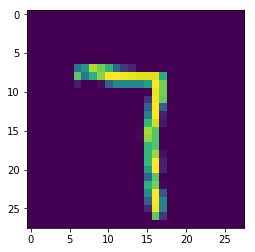

In [131]:
import matplotlib.pyplot as plt

test_digit = val_X[0][:,:,0]
plt.imshow(test_digit)

In [132]:
test_digit = test_digit.reshape(-1, IMG_ROWS, IMG_COLS, 1)

pred = food_model.predict_classes(test_digit, batch_size=1)
print(pred)

[7]


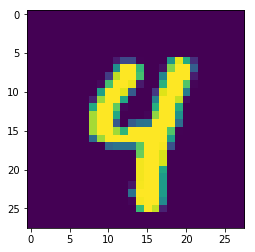

In [133]:
test_digit2 = val_X[1][:,:,0]
plt.imshow(test_digit2)

In [134]:
test_digit2 = test_digit2.reshape(-1, IMG_ROWS, IMG_COLS, 1)

pred2 = food_model.predict_classes(test_digit2, batch_size=1)
print(pred2)

[4]
